# Assignment 3: Implementation a Recursive Algorightm


In this Mini Programming Assignment, we will explore the differences between iteration and recursion.  We will begin with the base code for recursion as described in Chapter 3 of Grokking Algorithms (Bhargava 2016).


## Deliverables:

We will again generate random data for this assignment.  

    1) Set up five lists of randomly generated strings of characters (i.e. a-z or A-Z e.g. abcdefkjklkjlkjlkjkljlkjlkjlkjkljasdfgtredghjkiuyt). 
        Each string should be 50 characters long. The first list should have 200 strings (each string should be 50 characters long), 
        second should have 400 strings (again each string is 50 characters), third 600 (same length strings i.e. 50 characters), 
        fourth 800 (string length continues to be 50 characters), and 
        last/fifth 1000 strings (yes 50 characters in each string). 
    2) You may use the code we used in previous homework assignments.  Make sure the list is unsorted and does not contain any duplicates.
    3) Use the textbook implementation of quicksort to sort the data, being sure to capture the amount of time it takes for each list. 
    4) Now use at least two other sorting algorithms on the same data set (e.g. merge sort, bubble sort, insertion sort, etc).  
        Make sure that you code the sorting algorithm and you do not use a builtin function. By this I mean you may not use np.sort() or sorted(), etc.
        You must code the algorithm in order to compare the complexity of each.  Here is a good resource https://www.geeksforgeeks.org/sorting-algorithms/
        
        Capture the computation time for each list using each sorting algorithm that you have used. 

    5) Create a table containing each algorithm and the timings for each list.  Provide a graph showing how each algorithm scales with size of list (also compare the algorithms themselves).
        Discuss your findings with explanations for what you observe.  

### Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

# A. Setup: Library imports, Function construction and Array generation

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import time

import random
import string


RANDOM_SEED = 8 #sets random seed

In [2]:


def random_string(str_length, num_strings):
    str_list = [] #instantiates an empty list to hold the strings
    for i in range(0,num_strings): #loop to generate the specified number of strings
        str_list.append(''.join(random.choice(string.ascii_lowercase) for m in range(str_length))) #generates a string of the defined character length 
    return str_list #returns the string list


def QuickSort(arr):
    if len(arr) <2:
        return arr
    else:
        pivot = arr[0] #assigns the pivot as the first item of the array
        less = [i for i in arr[1:] if i <= pivot] #collects items less than the pivot value in less
        greater = [i for i in arr[1:] if i >pivot] #collects items greater than pivot value in greater

        return QuickSort(less) + [pivot] + QuickSort(greater) #recursively calls quicksort on items less than pivot and greater than pivot.


def MergeSort(arr):
    if len(arr) > 1:
          
        mid = len(arr)//2 # gets middle
        Left = arr[:mid] #splits elements left of middle
        Right = arr[mid:] #splits elements right of middle

        MergeSort(Left) #recursive call on left 
        MergeSort(Right) #recursive call on right
 #set all indicies to 0 
        i=0
        k=0
        j=0
 #below checks the values for if elements are sorted, if unsorted: swap. Merge to the original list    
        while i < len(Left) and j < len(Right):
            if Left[i] < Right[j]:
                arr[k] = Left[i] #makes k index of arr left[i] if it's less than Right[j]
                i += 1 #increments i (the left index)
               
            else:
                arr[k] = Right[j] #if right value is lss than left, makes arr[k] the value of right and increments the right index
                j += 1 #increments j
            k += 1 #increments the arr index
   
        while i < len(Left): #checks to see if reamaining elements in left (less than mid), if so adds to arr at k index and increments i and k
            arr[k] = Left[i]
            i += 1 #increments i
            k += 1 #increments k
 
        while j < len(Right): #checks to see if remaining elements in right (greater than mid), if so adds to arr at k index and increments j and k.
            arr[k] = Right[j]
            j += 1 #increments j
            k += 1 #increments k
        
        return arr

def BubbleSort(arr):
    [arr.append(arr.pop(0) if i == len(arr) - 1 or arr[0] < arr[1] else arr.pop(1)) for j in range(0, len(arr)) for i in range(0, len(arr))]
    #this will bubblesort in place. The comprehension adds the lower of the first two indicies to the end of the list iteratively over the length of the original         array until a sorted list is achieved
    return arr



def Container(arr, fun):
    objects = [] #instantiates an empty list to collect the returns
    times = [] #instantiates an empty list to collect times for each computation

    start= time.perf_counter() #collects the start time
    obj = fun(arr) # applies the function to the arr object
    end = time.perf_counter() # collects end time
    duration = (end-start)* 1E3 #converts to milliseconds
    objects.append(obj)# adds the returns of the functions to the objects list
    times.append(duration) # adds the duration for computation to list
    return objects, duration


In [3]:
 
str200 = random_string(str_length=50, num_strings=200)
str200_copy = str200[:]
str400 = random_string(str_length=50, num_strings=400)
str400_copy = str400[:]
str600 = random_string(str_length=50, num_strings=600)
str600_copy = str600[:]
str800 = random_string(str_length=50, num_strings=800)
str800_copy = str800[:]
str1000 = random_string(str_length=50, num_strings=1000)
str1000_copy = str1000[:]

# B. Sorting


In [4]:
str200_bubble = Container(str200, BubbleSort)
str200 = str200_copy[:]
str200_quick = Container(str200, QuickSort)
str200 = str200_copy[:]
str200_merge = Container(str200, MergeSort)


str200_bubble[1], str200_quick[1], str200_merge[1]



(20.799699999770382, 0.4861999996137456, 0.7431999997606908)

In [5]:
str400_bubble = Container(str400, BubbleSort)
str400 = str400_copy[:]
str400_quick = Container(str400, QuickSort)
str400 = str400_copy[:]
str400_merge = Container(str400, MergeSort)


str400_bubble[1], str400_quick[1], str400_merge[1]


(115.7693999998628, 0.9522000000288244, 2.348600000004808)

In [6]:
str600_bubble = Container(str600, BubbleSort)
str600 = str600_copy[:]
str600_quick = Container(str600, QuickSort)
str600 = str600_copy[:]
str600_merge = Container(str600, MergeSort)


str600_bubble[1], str600_quick[1], str600_merge[1]

(223.6366000001908, 1.7119999997703417, 3.678600000057486)

In [7]:
str800_bubble = Container(str800, BubbleSort)
str800 = str800_copy[:]
str800_quick = Container(str800, QuickSort)
str800 = str800_copy[:]
str800_merge = Container(str800, MergeSort)


str800_bubble[1], str800_quick[1], str800_merge[1]

(447.3662999998851, 2.0344999998087587, 3.393899999991845)

In [8]:
str1000_bubble = Container(str1000, BubbleSort)
str1000 = str1000_copy[:]
str1000_quick = Container(str1000, QuickSort)
str1000 = str1000_copy[:]
str1000_merge = Container(str1000, MergeSort)


str1000_bubble[1], str1000_quick[1], str1000_merge[1]

(793.3565000003, 2.7307000000291737, 4.70290000021123)

# C. Summary

In [9]:
Summary = {
    'NumberOfStrings': [200, 400, 600, 800, 1000],
    'BubbleSort': [str200_bubble[1], str400_bubble[1], str600_bubble[1], str800_bubble[1], str1000_bubble[1]],
    'MergeSort': [str200_merge[1], str400_merge[1] , str600_merge[1], str800_merge[1], str1000_merge[1]],
    'QuickSort': [str200_quick[1], str400_quick[1], str600_quick[1], str800_quick[1], str1000_quick[1]]
    }

df = pd.DataFrame.from_dict(Summary)


## Table 1: Times for each algorithm given the length of the starting list

In [10]:
df

,NumberOfStrings,BubbleSort,MergeSort,QuickSort
0,200,20.7997,0.7432,0.4862
1,400,115.7694,2.3486,0.9522
2,600,223.6366,3.6786,1.7120
3,800,447.3663,3.3939,2.0345
4,1000,793.3565,4.7029,2.7307


In [11]:
long_df =  df.melt(id_vars=['NumberOfStrings'],
                    value_vars=['BubbleSort', 'MergeSort', 'QuickSort'],var_name='Algo', value_name='Time(ms)') 

## Figure 1: Sorth Algorithm Time Complexity

<AxesSubplot:xlabel='NumberOfStrings', ylabel='Time(ms)'>

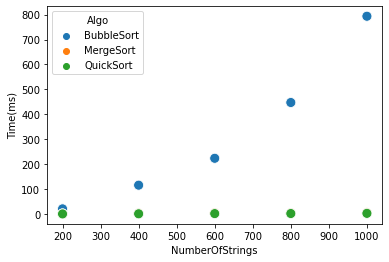

In [12]:
sns.scatterplot(data = long_df, x='NumberOfStrings', hue='Algo', y='Time(ms)', s=100)


## Figure 2: Merge and Quick Sort time complexity

<AxesSubplot:xlabel='NumberOfStrings', ylabel='Time(ms)'>

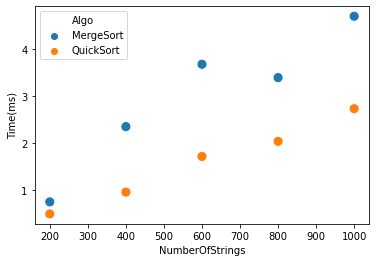

In [13]:
MergeQuick_df = long_df[long_df.Algo != 'BubbleSort']
sns.scatterplot(data = MergeQuick_df, x='NumberOfStrings', hue='Algo', y='Time(ms)', s=100)

# Discussion

Three sorting algorithms were tested for their time complexity in sorting lists of varying sizes of string elements. Each string element in the list was randomly populated with 50 alphabetic lower case characters. The number of elements within the list was varied. Five lists containing 200, 400, 600, 800, and 1000 strings were sorted via BubbleSort, MergeSort, and QuickSort. The times (given in milliseconds) required to perform the sort are collected and displayed in Table 1. By far, the most inefficient sorting algorithm demonstrated here is the bubble sort whose complexity is shown graphically (figure 1) to grow at n\*n or O(n^2) rate. This makes sense for bubble sort as it compares n elements amongst n elements.  

Alternatively, the other two methodologies utilize a divide and conquer strategy. The list of strings when using QuickSort are divided into two arrays (greater and less) which contain values which are greater or less than a pivot value. In MergeSort a similar strategy is achieved by dividing the list into two arrays (left and right) which are left and right respectivly from the center element of the list. In both of these arrays recursion is used as the QuickSort and MergeSort functions are called on the subarrays. The result of this divide and conquer strategy is a complexity of n*logn or O(n*logn) in big O notation. A direct comparision of the times required for sorting the lists with these two methodologies are shown in Figure 2. 

In rare instances QuickSort may also dramatically underperform as the pivot element is always selected as the first item of the array (or subarray). If an array contained a list which was sorted largest to smallest already, this method could also have very high complexity as you would not divide the list recursively for an array of n size (this would also be n\*n complexity O(n^2)). It is interesting the QuickSort seems to perform slightly better than MergeSort, but both are quite efficient. Because of the splitting methodology employed by the MergeSort, there lacks a risk of any deviation from the O(n*logn) complexity. The begining array and subarrays are always split in half size-wise. It's therefore recommended that the MergeSort method be used as the time complexity will always be constant. 

# ------------------------ END ------------------------
